In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
df=pd.read_csv('/content/Salary_Data.csv')

In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
x=df[['YearsExperience']]      #input
y=df['Salary']                 #output

In [9]:
x=df.iloc[:,0].values.reshape(len(df),1)
y=df.iloc[:,1].values

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [17]:
ypred=model.predict(xtest)
ypred

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

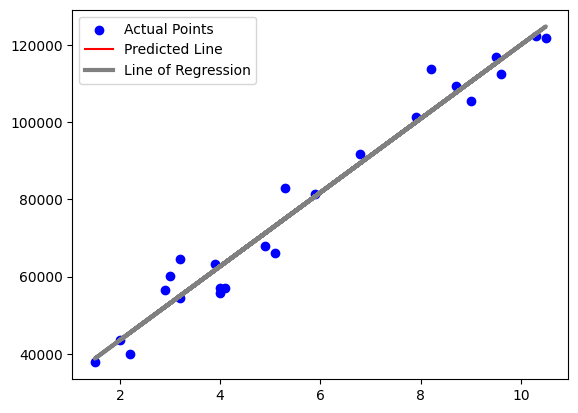

In [47]:
#draw line of regression
plt.scatter(xtrain,ytrain,color='blue',label='Actual Points')
plt.plot(xtrain,model.predict(xtrain),color='red',label='Predicted Line')
plt.plot(xtrain,model.predict(xtrain),color='grey',lw=3,label='Line of Regression')
plt.legend()
plt.show()

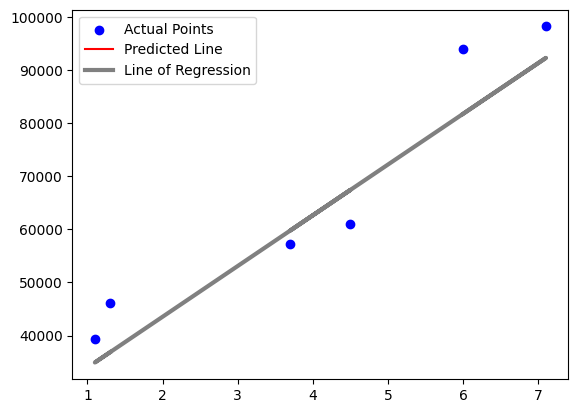

In [43]:
plt.scatter(xtest,ytest,color='blue',label='Actual Points')
plt.plot(xtest,model.predict(xtest),color='red',label='Predicted Line')
plt.plot(xtest,model.predict(xtest),color='grey',lw=3,label='Line of Regression')
plt.legend()
plt.show()

In [25]:
data=pd.DataFrame({'Actual':ytest,'Predicted':ypred})
data

,Actual,Predicted
0,46205.0,36833.632103
1,39343.0,34919.714726
2,61111.0,67456.310136
3,57189.0,59800.640628
4,98273.0,92337.236039
5,93940.0,81810.690465


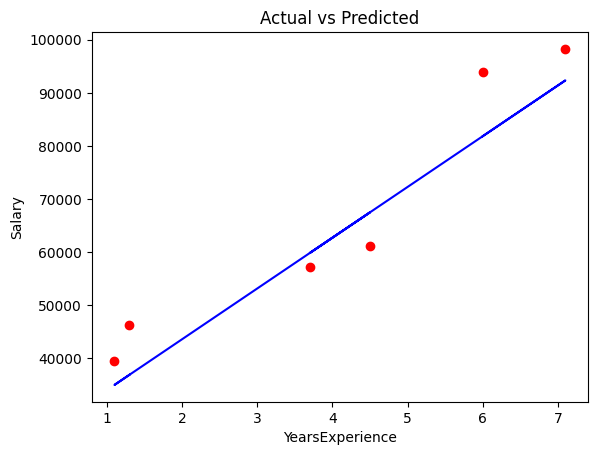

In [26]:
#generate graph with actual and predicted values
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,ypred,color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()


<Axes: >

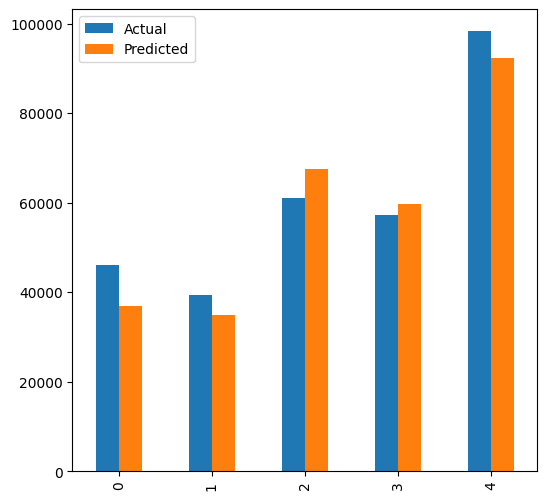

In [36]:
graph=data.head(5)
graph.plot(kind='bar',figsize=(6,6))

In [24]:
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)
print(mae)
print(mse)
print(r2)


6802.779572073899
56137509.997825526
0.8886956733784563


In [48]:
model.intercept_

24393.169151948343

In [50]:
accuracy=[]
for i in range(501):
  xtrain_1,xtest_1,ytrain_1,ytest_1=train_test_split(x,y,test_size=0.2,random_state=i)
  model_1=LinearRegression()
  model_1.fit(xtrain_1,ytrain_1)
  ypred_1=model_1.predict(xtest_1)
  score_1=r2_score(ytest_1,ypred_1)
  accuracy.append(r2_score(ytest_1,ypred_1))

In [54]:
print(np.max(accuracy))
print(np.argmax(accuracy))

0.9952429110093546
200


In [55]:
accuracy

[0.988169515729126,
 0.7616681465472094,
 0.8886956733784563,
 0.9695039421049821,
 0.9504404484884267,
 0.9439628569611376,
 0.9368146227107087,
 0.8143022783109006,
 0.9631182154839476,
 0.9388416537799072,
 0.9816423482070253,
 0.940882728477622,
 0.9429269163491423,
 0.9394460269118793,
 0.9606215790278543,
 0.8697012433817218,
 0.7949890249259297,
 0.9384744808306155,
 0.8864330645841889,
 0.9415531751862448,
 0.9441299149555877,
 0.9398582853702572,
 0.8870702615446784,
 0.9184170849214232,
 0.9520702017424296,
 0.9531732818427658,
 0.9835849730044816,
 0.9636425773684423,
 0.9217841352107623,
 0.9467172742609803,
 0.9944092048209745,
 0.8967649524853983,
 0.8985995727228404,
 0.9350785573211586,
 0.9244141448042442,
 0.8839476512584652,
 0.955021106900739,
 0.9778242092591888,
 0.972479448737762,
 0.9928344802911048,
 0.7775083459037234,
 0.9802519469633169,
 0.9024461774180497,
 0.8688045158887867,
 0.934951117043928,
 0.9250487875802145,
 0.9789129767378081,
 0.98399193890564,

In [56]:
model.predict([[15]])

array([167936.97243344])

In [59]:
def salary():
  exp=float(input('Enter the experience: '))
  sal=model.predict([[exp]])
  print('The expected salary would be '+str(round(sal[0],2)))


In [60]:
salary()

Enter the experience: 15
The expected salary would be 167936.97


In [62]:
joblib.dump(model,'salary.pkl')

['salary.pkl']

In [63]:
mymodel=joblib.load('salary.pkl')

In [66]:
round(mymodel.predict([[15]])[0],2)

167936.97